In [2]:
import traci
import sumolib

In [3]:
def new_logic(ggrr, yyrr, rrgg, rryy):

    tls_ids = traci.trafficlight.getIDList()
    id_semaforo = tls_ids[0]
    programa = traci.trafficlight.getAllProgramLogics(id_semaforo)
    
    from traci._trafficlight import Logic, Phase

    new_logic = Logic(programID="nuevo_programa", type=0,currentPhaseIndex=0,phases=[Phase(duration=ggrr, state="GGrr", minDur=ggrr, maxDur=ggrr ), Phase(duration=yyrr, state='yyrr', minDur=yyrr, maxDur=yyrr), Phase(duration=rrgg, state='rrGG', minDur=rrgg, maxDur=rrgg), Phase(duration=rryy, state='rryy', minDur=rryy, maxDur=rryy)])

    traci.trafficlight.setProgramLogic(id_semaforo, new_logic)

    traci.trafficlight.setProgram(id_semaforo, "nuevo_programa")

    #print(traci.trafficlight.getCompleteRedYellowGreenDefinition(id_semaforo))


In [4]:
import numpy as np

def n_vehiculos(n0, n1):

    t0=0
    t1=0
    for i in range(n0):

        t0+= np.random.exponential(scale=3600/n0)

        traci.vehicle.add(
            vehID=f"veh_r0_{i}",
            routeID="r_0", # Asegúrate de tener un tipo definido (por defecto puedes omitir esto si usas default)
            depart=t0
        )

    for i in range(n1):

        t1+= np.random.exponential(scale=3600/n1)

        traci.vehicle.add(
            vehID=f"veh_r1_{i}",
            routeID="r_1",
            depart=t1
        )

In [39]:
import random as rd
import pandas as pd
import traci
import sumolib

avgtimes=[]#tiempos promedio
ggrrs = []#(verde Norte-Sur)
yyrrs = []#(amarillo Norte-Sur)
rrggs = []# (verde Este-Oeste)
rryys = []#(amarillo Este-Oeste)
n0s = []#Tiempos ruta 0
n1s = []#Tiempos ruta 1
num_simulations = 50

f0 = [i for i in range(10,1500, 10)]
f1 = [i for i in range(10,2500, 10)]


for i in range(num_simulations):

    n0 = rd.choice(f0)
    #n1 = rd.choice(f1)
    n1 = n0

    n0s.append(n0)
    n1s.append(n1)

    sumoBinary = "sumo"
    sumoCmd = [sumoBinary, "-c", "prueba.sumocfg"]

    traci.start(sumoCmd)

    n_vehiculos(n0, n1)

    #ggrr = rd.randint(10,60) #(verde Norte-Sur) 
    #yyrr = rd.randint(3,6) #(amarillo Norte-Sur)
    #rrgg = rd.randint(10,60) # (verde Este-Oeste)
    #rryy = rd.randint(3,6) #(amarillo Este-Oeste)

    #ggrrs.append(ggrr)
    #yyrrs.append(yyrr)
    #rrggs.append(rrgg)
    #ryys.append(rryy)

    new_logic(60, 4, 50, 4)

    depart_times = {}
    arrival_times = {}
    simulation_durations = {}

    for step in range(3600):
        traci.simulationStep()

        departed_vehicles = traci.simulation.getDepartedIDList()
        current_time = traci.simulation.getTime()
        for veh_id in departed_vehicles:
            if veh_id not in depart_times:
                depart_times[veh_id] = current_time
        
        

        arrived_vehicles = traci.simulation.getArrivedIDList()
        current_time = traci.simulation.getTime()
        for veh_id in arrived_vehicles:
            if veh_id not in arrival_times:
                arrival_times[veh_id] = current_time



    for veh_id, arrival_time in arrival_times.items():
        if veh_id in depart_times:
            departure_time = depart_times[veh_id]
            duration = arrival_time - departure_time
            simulation_durations[veh_id] = duration

    average = sum(simulation_durations.values())/len(simulation_durations)

    avgtimes.append(average)

    traci.close()
    print(i+1)
data = {
    'Simulation' : range(1, num_simulations + 1),
    'Tiempo promedio' : avgtimes,
    'Autos r_0': n0s,
    'Autos r_1': n1s
}

df100 = pd.DataFrame(data)
df100

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


,Simulation,Tiempo promedio,Autos r_0,Autos r_1
0,1,99.686941,290,290
1,2,109.149444,930,930
2,3,104.635503,430,430
3,4,112.344262,1340,1340
4,5,110.378743,1040,1040
5,6,112.423903,1200,1200
6,7,102.922727,110,110
7,8,109.813327,1020,1020
8,9,104.513623,530,530
9,10,109.832492,1040,1040


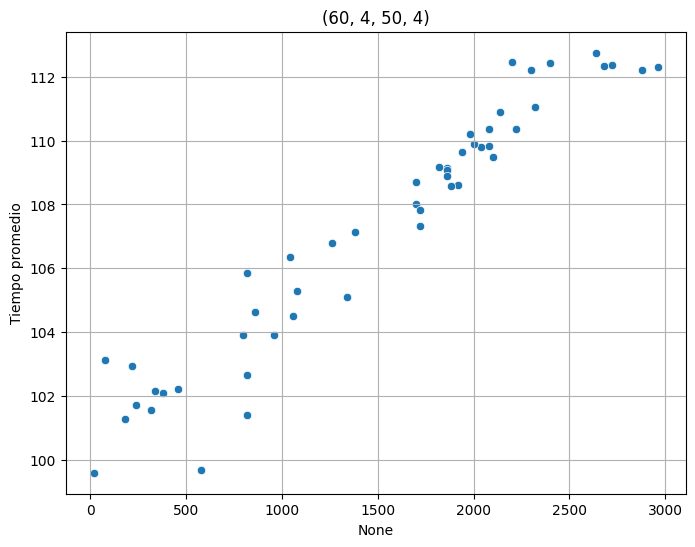

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.scatterplot(x=df100['Autos r_1']+df100['Autos r_0'], y=df100['Tiempo promedio'])
plt.title('(60, 4, 50, 4)')
plt.grid(True)
plt.show()

In [9]:
traci.close()

In [9]:
import random as rd
import pandas as pd

ggrr = rd.randint(10,70) #(verde Norte-Sur) 
yyrr = rd.randint(3,6) #(amarillo Norte-Sur)
rrgg = rd.randint(10,70) # (verde Este-Oeste)
rryy = rd.randint(3,6) #(amarillo Este-Oeste)

In [13]:
rryy

6

In [57]:
d = pd.concat([d1, d2, d3, d4, d5], ignore_index = True)

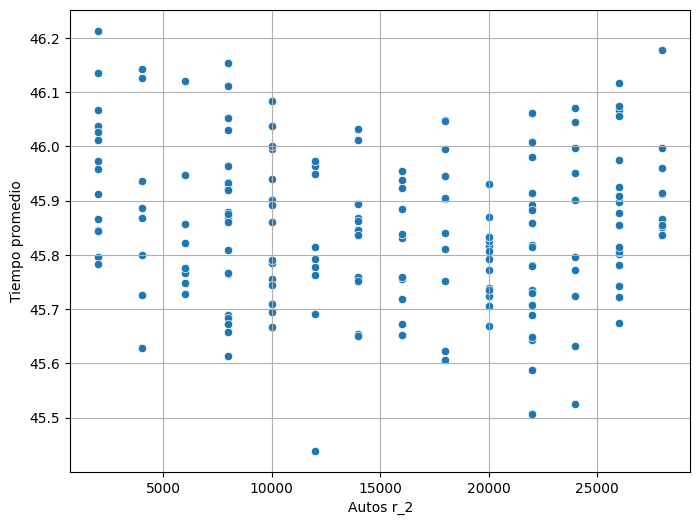

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.scatterplot(x=d['Autos r_2'], y=d['Tiempo promedio'])
plt.grid(True)
plt.show()

In [ ]:
#Se importan algunos de los paquetes requeridos
import random as rd
import pandas as pd
import traci
import sumolib

avgtimes=[]#tiempos promedio
ggrrs = []#(verde Norte-Sur)
yyrrs = []#(amarillo Norte-Sur)
rrggs = []# (verde Este-Oeste)
rryys = []#(amarillo Este-Oeste)
n0s = []#Tiempos ruta 0
n1s = []#Tiempos ruta 1
num_simulations = 1

f0 = [i for i in range(10,1500, 10)]
f1 = [i for i in range(10,2000, 10)]


for i in range(num_simulations):

    n0 = rd.choice(f0)
    n1 = rd.choice(f1)

    n0s.append(n0)
    n1s.append(n1)

    sumoBinary = "sumo"
    sumoCmd = [sumoBinary, "-c", "prueba.sumocfg"]

    traci.start(sumoCmd)

    n_vehiculos(n0, n1)

    ggrr = rd.randint(30,70) #(verde Norte-Sur) 
    yyrr = rd.randint(3,7) #(amarillo Norte-Sur)
    rrgg = rd.randint(30,70) # (verde Este-Oeste)
    rryy = rd.randint(3,7) #(amarillo Este-Oeste)

    ggrrs.append(ggrr)
    yyrrs.append(yyrr)
    rrggs.append(rrgg)
    rryys.append(rryy)

    new_logic(ggrr, yyrr, rrgg, rryy)
    
    depart_times = {}
    arrival_times = {}
    simulation_durations = {}

    for step in range(3600):
        traci.simulationStep()

        departed_vehicles = traci.simulation.getDepartedIDList()
        current_time = traci.simulation.getTime()
        for veh_id in departed_vehicles:
            if veh_id not in depart_times:
                depart_times[veh_id] = current_time
        
        

        arrived_vehicles = traci.simulation.getArrivedIDList()
        current_time = traci.simulation.getTime()
        for veh_id in arrived_vehicles:
            if veh_id not in arrival_times:
                arrival_times[veh_id] = current_time



    for veh_id, arrival_time in arrival_times.items():
        if veh_id in depart_times:
            departure_time = depart_times[veh_id]
            duration = arrival_time - departure_time
            simulation_durations[veh_id] = duration

    average = sum(simulation_durations.values())/len(simulation_durations)

    avgtimes.append(average)

    traci.close()
    print(i+1)
data = {
    'Simulation' : range(1, num_simulations + 1),
    'Tiempo promedio' : avgtimes,
    'GGrr (s)' : ggrrs,
    'yyrr (s)' : yyrrs,
    'rrGG (s)' : rrggs,
    'rryy (s)' : rryys,
    'Autos r_0': n0s,
    'Autos r_1': n1s
}

df100 = pd.DataFrame(data)
df100